<a href="https://colab.research.google.com/github/dpanagop/ML_and_AI_examples/blob/master/NLPexample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Download content from wikipedia
First wikipedia library must be installed 

In [1]:
!pip install wikipedia

Download content from Wikipedia on
* Data Science
* Artificial intelligence
* Machine Learning
* European Central Bank
* Bank
* Financial technology
* International Monetary Fund
* Basketball
* Swimming
* Tennis

In [2]:
import pandas as pd
import wikipedia
articles=['Data Science','Artificial intelligence','Machine Learning',
          'European Central Bank','Bank','Financial technology','International Monetary Fund',
          'Basketball','Swimming','Tennis']
wiki_lst=[]
title=[]
for article in articles:
    print("loading content: ",article)
    wiki_lst.append(wikipedia.page(article).content)
    title.append(article)
print("examine content")
wiki_lst

loading content:  Data Science
loading content:  Artificial intelligence
loading content:  Machine Learning
loading content:  European Central Bank
loading content:  Bank
loading content:  Financial technology
loading content:  International Monetary Fund
loading content:  Basketball
loading content:  Swimming
loading content:  Tennis
examine content


['Data science is a multi-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from structured and unstructured data. Data science is the same concept as data mining and big data: "use the most powerful hardware, the most powerful programming systems, and the most efficient algorithms to solve problems".Data science is a "concept to unify statistics, data analysis, machine learning and their related methods" in order to "understand and analyze actual phenomena" with data. It employs techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, and information science. Turing award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational and now data-driven) and asserted that "everything about science is changing because of the impact of information technology" and the data deluge. In 2015, the American Statistical Associ

##TF-IDF example

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'eglish'})
X = vectorizer.fit_transform(wiki_lst)

In [4]:
print(vectorizer.get_feature_names())
print(X.shape)

['00', '000', '0001', '001', '008', '01', '03', '048', '05', '06', '07', '08', '10', '100', '1000', '100k', '101', '11', '110', '115', '12', '120', '12000', '122', '123', '127', '128', '129', '12th', '13', '13000', '1316', '1397', '13th', '14', '140', '1407', '141', '14th', '15', '150', '1500', '1538', '155', '1599', '16', '160', '169', '1695', '16th', '17', '1700', '1728', '17th', '18', '180', '1800', '18000', '1830', '1859', '1861', '1863', '1865', '1872', '1873', '1874', '1875', '1877', '188', '1880', '1881', '1887', '189', '1890s', '1891', '1892', '1893', '1895', '1896', '1897', '1898', '1899', '18th', '19', '1900', '1901', '1904', '1905', '1906', '1907', '1908', '1910', '1913', '1915', '1917', '1920', '1920s', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1930s', '1932', '1936', '1937', '1938', '1939', '1940', '1940s', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1950s', '1951', '1952', '1953', '1954', '1956', '1959', '1960', 

In [5]:
print(X[0,])

  (0, 6459)	0.0037029549627652877
  (0, 963)	0.004882174786821787
  (0, 8113)	0.01001556037118422
  (0, 4340)	0.005947448544705713
  (0, 2217)	0.005947448544705713
  (0, 1729)	0.006622577058254981
  (0, 2868)	0.00851414133688693
  (0, 3053)	0.01001556037118422
  (0, 1942)	0.0053766355198257235
  (0, 1838)	0.00851414133688693
  (0, 5654)	0.007448867579003004
  (0, 2137)	0.004055884266073765
  (0, 6712)	0.01001556037118422
  (0, 5017)	0.01001556037118422
  (0, 6890)	0.005947448544705713
  (0, 1256)	0.00851414133688693
  (0, 3007)	0.00851414133688693
  (0, 7588)	0.01001556037118422
  (0, 4397)	0.00851414133688693
  (0, 8024)	0.006622577058254981
  (0, 6609)	0.01001556037118422
  (0, 2860)	0.007448867579003004
  (0, 5860)	0.006622577058254981
  (0, 692)	0.005947448544705713
  (0, 8261)	0.004446029510408423
  :	:
  (0, 826)	0.07776205421807104
  (0, 1826)	0.01784234563411714
  (0, 6862)	0.004055884266073765
  (0, 7831)	0.37770140620205933
  (0, 8233)	0.00851414133688693
  (0, 7517)	0.007448

In [0]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

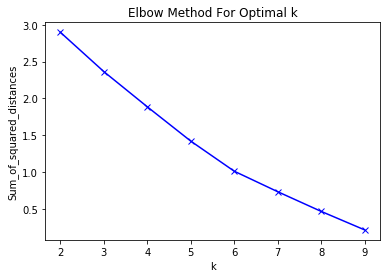

In [7]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [8]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                         title  cluster
8                     Swimming        0
1      Artificial intelligence        1
2             Machine Learning        1
7                   Basketball        2
9                       Tennis        2
0                 Data Science        3
3        European Central Bank        4
4                         Bank        4
6  International Monetary Fund        4
5         Financial technology        5


Cluster: 0
Titles
 Swimming


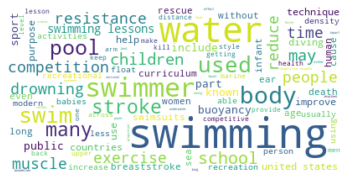

Cluster: 1
Titles
 Artificial intelligence
        Machine Learning


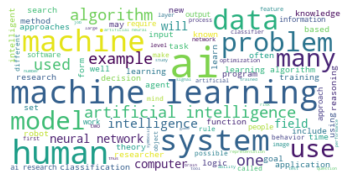

Cluster: 2
Titles
 Basketball
     Tennis


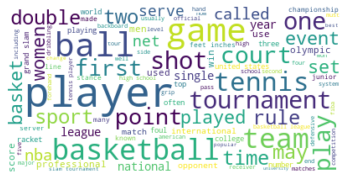

Cluster: 3
Titles
 Data Science


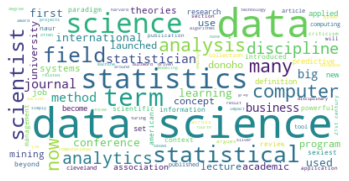

Cluster: 4
Titles
       European Central Bank
                        Bank
 International Monetary Fund


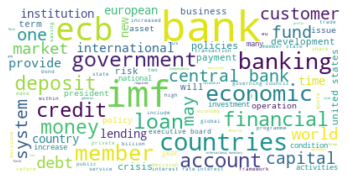

Cluster: 5
Titles
 Financial technology


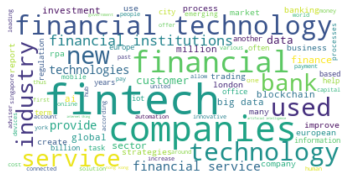

In [9]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()